In [19]:
import datetime

import IPython.display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection

In [4]:
# データウェアハウス
df_aapl = pandas_datareader.data.DataReader("AAPL", "yahoo", "2014-11-01")
df_fb = pandas_datareader.data.DataReader("FB", "yahoo", "2014-11-01")
df_gold = pandas_datareader.data.DataReader("GLD", "yahoo", "2014-11-01")

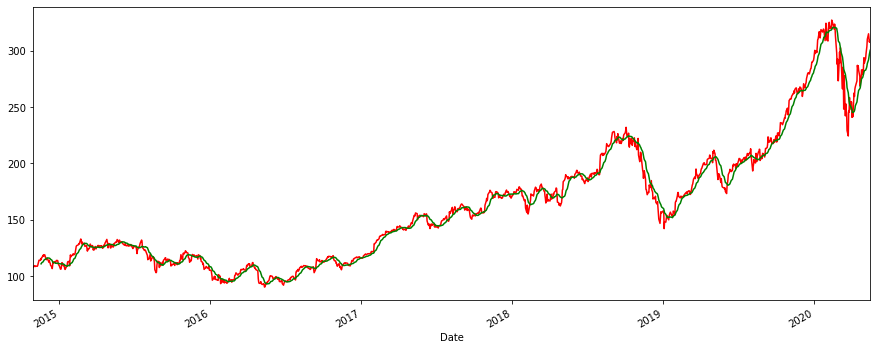

In [5]:
# 統計学　simple moving average
df_aapl["SMA"] = df_aapl["Close"].rolling(window=14).mean()
df_aapl["Close"].plot(figsize=(15, 6), color="red")
df_aapl["SMA"].plot(figsize=(15, 6), color="green")
plt.show()

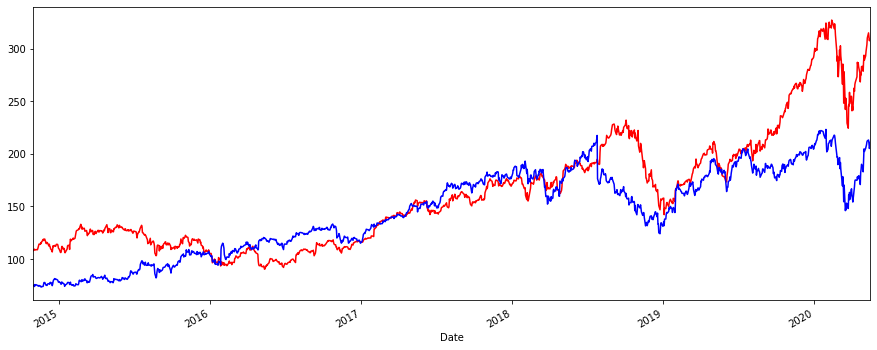

In [8]:
# データマイニング
df_aapl["change"] = (((df_aapl["Close"] - df_aapl["Open"])) / (df_aapl["Open"]) * 100)
df_fb["change"] = (((df_fb["Close"] - df_fb["Open"])) / (df_fb["Open"]) * 100)
df_gold["change"] = (((df_gold["Close"] - df_gold["Open"])) / (df_gold["Open"]) * 100)

df_aapl["Close"].plot(figsize=(15, 6), color="red")
df_fb["Close"].plot(figsize=(15, 6), color="blue")
plt.show()

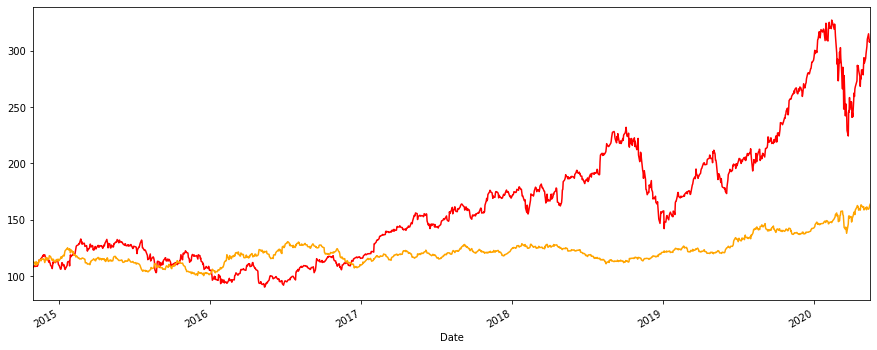

In [10]:
df_aapl["Close"].plot(figsize=(15, 6), color="red")
df_gold["Close"].plot(figsize=(15, 6), color="orange")
plt.show()

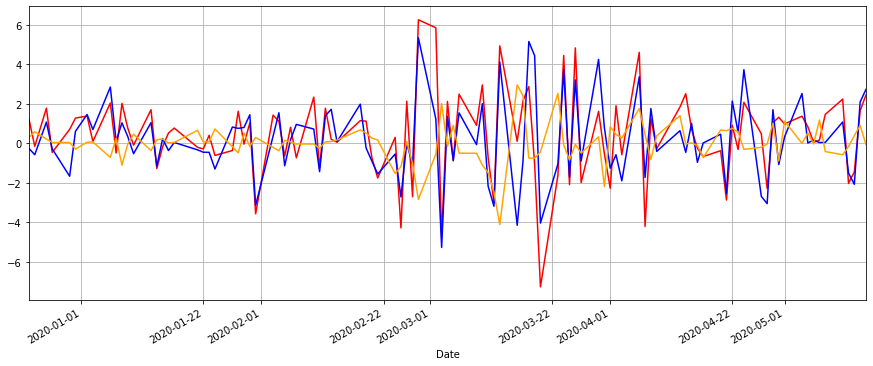

In [11]:
df_aapl["change"].tail(100).plot(grid=True, figsize=(15, 6), color="red")
df_fb["change"].tail(100).plot(grid=True, figsize=(15, 6), color="blue")
df_gold["change"].tail(100).plot(grid=True, figsize=(15, 6), color="orange")
plt.show()

In [12]:
# 機械学習（マシンラーニング）
df_aapl["label"] = df_aapl["Close"].shift(-30)
df_aapl.tail(40)

,High,Low,Open,Close,Volume,Adj Close,SMA,change,label
Date,,,,,,,,,
2020-03-20,251.830002,228.000000,247.179993,229.240005,100423300.0,228.621140,267.350716,-7.257864,293.160004
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,223.764267,262.711429,-1.626625,297.559998
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.213516,258.721430,4.450840,300.630005
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,244.857178,255.335715,-2.085741,303.739990
2020-03-26,258.679993,246.360001,246.520004,258.440002,63021800.0,257.742310,253.150715,4.835307,310.130005
2020-03-27,255.869995,247.050003,252.750000,247.740005,51054200.0,247.071182,251.834286,-1.982194,315.010010
2020-03-30,255.520004,249.399994,250.740005,254.809998,41994100.0,254.122101,249.653572,1.623192,311.410004
2020-03-31,262.489990,252.000000,255.600006,254.289993,49250500.0,253.603500,248.143572,-0.512525,307.649994
2020-04-01,248.720001,239.130005,246.500000,240.910004,44054600.0,240.259628,247.620716,-2.267747,309.540009


In [20]:
# ラベル行を削除したデータをxに代入
X = np.array(df_aapl.drop(['label', 'SMA'], axis=1))
# 取りうる値の大小が著しく異なる特微量を入れると結果が悪くなり、平均を引いて標準偏差で割ってスケーリングする
X = sklearn.preprocessing.scale(X)

# 予測に使う過去30日間のデータ
predict_data = X[-30:]
# 過去30日間を取り除いた入力データ
X = X[:-30]
y = np.array(df_aapl["label"])
# 過去30日を取り除いた正解ラベル
y = y[:-30]

# 訓練データ80% 検証データ20%に分ける
# 第1引数に入力データ、第2引数に正解ラベルの配列
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

# 訓練データを用いて学習する
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

# 検証データを用いて検証してみる
accuracy = lr.score(X_test, y_test)
accuracy

0.8849276142737968

In [21]:
# 予測する
predict_data = lr.predict(predict_data)
predict_data

array([254.07281372, 266.87271098, 272.09080981, 273.09203979,
       275.46440654, 277.66302354, 288.85337995, 288.74967147,
       290.44929586, 287.42081786, 284.7155044 , 277.65213486,
       281.71543921, 283.54566899, 286.18040512, 287.76687526,
       286.56787662, 291.49438164, 295.75228716, 295.1286415 ,
       294.42641879, 300.35149358, 303.27635942, 305.4705965 ,
       312.35392326, 316.08653602, 317.93270524, 313.23865402,
       311.06810572, 309.70284183])

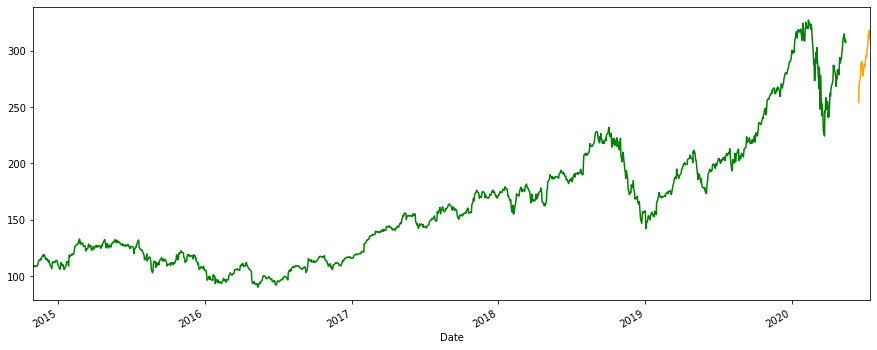

In [23]:
df_aapl["Predict"] = np.nan
last_date = df_aapl.iloc[-1].name

one_day = 86400
next_unix = last_date.timestamp() + one_day

for data in predict_data:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_aapl.loc[next_date] = np.append([np.nan]* (len(df_aapl.columns)-1), data)

df_aapl["Close"].plot(figsize=(15, 6), color="green")
df_aapl["Predict"].plot(figsize=(15, 6), color="orange")
plt.show()